In [14]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Model configuration
batch_size = 64
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 100
optimizer = Adam()
validation_split = 0.2
verbosity = 1

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape : {X_train.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape : (50000, 32, 32, 3)
y_test shape : (10000, 1)


Epoch 1/100
625/625 [==============================] - 3s 5ms/step - loss: 4.2201 - accuracy: 0.0804 - val_loss: 3.6964 - val_accuracy: 0.1407
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 3.4967 - accuracy: 0.1716 - val_loss: 3.4081 - val_accuracy: 0.1836
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 3.2220 - accuracy: 0.2187 - val_loss: 3.2351 - val_accuracy: 0.2198
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 3.0047 - accuracy: 0.2591 - val_loss: 3.1057 - val_accuracy: 0.2438
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 2.8416 - accuracy: 0.2874 - val_loss: 3.0838 - val_accuracy: 0.2587
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 2.6980 - accuracy: 0.3207 - val_loss: 3.0606 - val_accuracy: 0.2688
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 2.5648 - accuracy: 0.3445 - val_loss: 2.9999 - val_accuracy: 0.2757

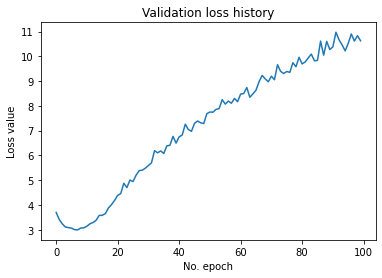

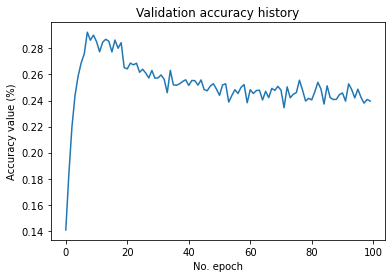

In [13]:
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = X_train.astype('float32')
input_test = X_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history = model.fit(X_train, y_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()